In [214]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances
import seaborn as sns
dataf = pd.read_csv('../DATASET/Hasil_Gabungan.csv')

In [215]:
features1 = ['Residential_2021', 'Business_2021', 'Industrial_2021', 'Social_2021', 'Gov_Office_2021', 'Pub_Street_2021', 'Total_2021', 'JP_2021', 'KP_2021']
np.random.seed(42)  
data_T2021 = dataf[features1]
scaler = RobustScaler()
scaled_features = scaler.fit_transform(data_T2021)

k =2
medoid = np.random.choice(len(scaled_features), size=k, replace=False)
medoids = scaled_features[medoid]

def update_medoids(dataf, medoids):
    distances = pairwise_distances(dataf, medoids)
    labels = np.argmin(distances, axis=1)

    new_medoids = []
    for i in range(k):
        cluster_points = dataf[labels == i]
        intra_distances = pairwise_distances(cluster_points)
        min_index = np.argmin(intra_distances.sum(axis=1))
        new_medoids.append(cluster_points[min_index])
    
    return np.array(new_medoids), labels

for _ in range(len(scaled_features)):  
    new_medoids, labels = update_medoids(scaled_features, medoids)
    if np.allclose(new_medoids, medoids):
        break
    medoids = new_medoids

dataf['Cluster'] = labels

provinsi_per_cluster = dataf[['Province', 'Cluster']].sort_values(by='Cluster')


for cluster in range(k):  
    print(f"Provinsi dalam Cluster {cluster}:")
    print(provinsi_per_cluster[provinsi_per_cluster['Cluster'] == cluster]['Province'].tolist())

    print(f"Nilai data point (medoid) untuk Cluster {cluster}:")
    print(medoids[cluster])  
    print("\n")

Provinsi dalam Cluster 0:
['DKI Jakarta', 'Jawa Timur', 'Banten', 'Jawa Tengah', 'Jawa Barat']
Nilai data point (medoid) untuk Cluster 0:
[ 6.27825292  5.21211718 16.00603189  7.45034583  5.33631975  5.40676033
  8.639279    6.34919019  8.59140282]


Provinsi dalam Cluster 1:
['Aceh', 'Sumatera Barat', 'Sumatera Utara', 'Kep. Bangka Belitung', 'Lampung', 'Kalimantan Barat', 'Riau', 'Kep. Riau', 'Sumatera Selatan', 'Jambi', 'Bengkulu', 'Sulawesi Tengah', 'Gorontalo', 'Sulawesi Utara', 'Kalimantan Tengah', 'Kalimantan Selatan', 'Sulawesi Selatan', 'Sulawesi Barat', 'Sulawesi Tenggara', 'Bali', 'Papua Barat', 'Papua', 'Maluku Utara', 'Maluku', 'Nusa Tenggara Timur', 'Nusa Tenggara Barat', 'DI Yogyakarta', 'Kalimantan Timur', 'Kalimantan Utara']
Nilai data point (medoid) untuk Cluster 1:
[-0.20247486 -0.24364534 -0.06129464 -0.17519406 -0.21424986 -0.28463274
 -0.14447053 -0.26433601 -0.05989266]




C:\Users\Jeff\AppData\Local\Temp\ipykernel_21284\2668390853.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataf, x='Cluster', y=feature, ci=None)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_21284\2668390853.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataf, x='Cluster', y=feature, ci=None)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_21284\2668390853.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataf, x='Cluster', y=feature, ci=None)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_21284\2668390853.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataf, x='Cluster', y=feature, ci=None)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_21284\2668390853.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorb

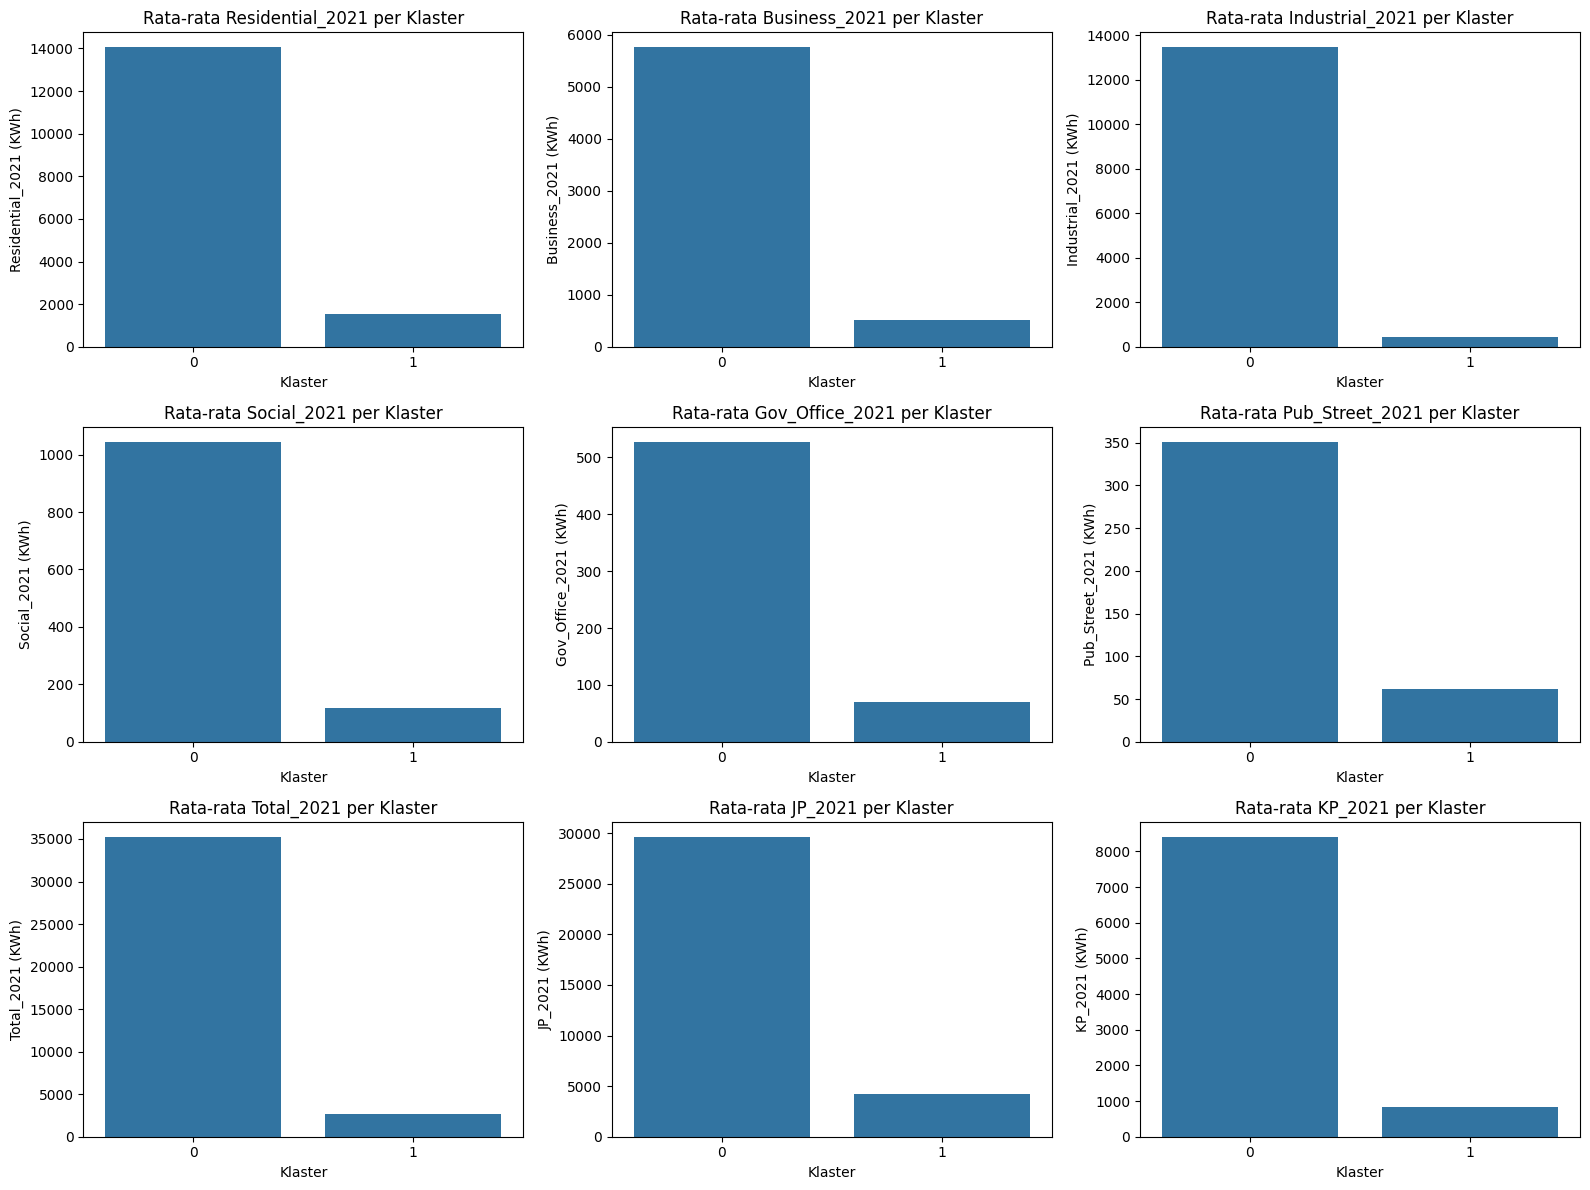

In [216]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features1, 1):
    plt.subplot(3, 3, i)  
    sns.barplot(data=dataf, x='Cluster', y=feature, ci=None)  
    plt.title(f"Rata-rata {feature} per Klaster")
    plt.xlabel("Klaster")
    plt.ylabel(f"{feature} (KWh)")
plt.tight_layout()
plt.show()

In [217]:
features2 = ['Residential_2022', 'Business_2022', 'Industrial_2022', 'Social_2022', 'Gov_Office_2022', 'Pub_Street_2022', 'Total_2022', 'JP_2022', 'KP_2022']
np.random.seed(42)
data_T2022 = dataf[features2]

scaler2 = RobustScaler()
scaled_features2 = scaler2.fit_transform(data_T2022)


k =2
medoid2 = np.random.choice(len(scaled_features2), size=k, replace=False)
medoids2 = scaled_features2[medoid2]

def update_medoids(dataf, medoids2):
    distances = pairwise_distances(dataf, medoids2)
    labels2 = np.argmin(distances, axis=1)

    new_medoids2 = []
    for i in range(k):
        cluster_points2 = dataf[labels2 == i]
        intra_distances2 = pairwise_distances(cluster_points2)
        min_index2 = np.argmin(intra_distances2.sum(axis=1))
        new_medoids2.append(cluster_points2[min_index2])
    
    return np.array(new_medoids2), labels2

for _ in range(len(scaled_features2)):  
    new_medoids2, labels2 = update_medoids(scaled_features2, medoids2)
    if np.allclose(new_medoids2, medoids2):
        break
    medoids2 = new_medoids2

dataf['Cluster2'] = labels2

provinsi_per_cluster = dataf[['Province', 'Cluster2']].sort_values(by='Cluster2')


for cluster in range(k):  
    print(f"Provinsi dalam Cluster2 {cluster}:")
    print(provinsi_per_cluster[provinsi_per_cluster['Cluster2'] == cluster]['Province'].tolist())

    print(f"Nilai data point (medoid) untuk Cluster2 {cluster}:")
    print(medoids2[cluster])  
    print("\n")

Provinsi dalam Cluster2 0:
['DKI Jakarta', 'Jawa Timur', 'Banten', 'Jawa Tengah', 'Jawa Barat']
Nilai data point (medoid) untuk Cluster2 0:
[ 6.16110003  5.27641975 15.64054654  7.33769858  5.71965175  5.31808404
  8.4137793   9.12227989  8.52112945]


Provinsi dalam Cluster2 1:
['Aceh', 'Sumatera Barat', 'Sumatera Utara', 'Kep. Bangka Belitung', 'Lampung', 'Kalimantan Barat', 'Riau', 'Kep. Riau', 'Sumatera Selatan', 'Jambi', 'Bengkulu', 'Sulawesi Tengah', 'Gorontalo', 'Sulawesi Utara', 'Kalimantan Tengah', 'Kalimantan Selatan', 'Sulawesi Selatan', 'Sulawesi Barat', 'Sulawesi Tenggara', 'Bali', 'Papua Barat', 'Papua', 'Maluku Utara', 'Maluku', 'Nusa Tenggara Timur', 'Nusa Tenggara Barat', 'DI Yogyakarta', 'Kalimantan Timur', 'Kalimantan Utara']
Nilai data point (medoid) untuk Cluster2 1:
[-0.19747959 -0.23997872 -0.03668576 -0.15961955 -0.21898643 -0.19441656
 -0.13445363 -0.38040837 -0.04444455]




C:\Users\Jeff\AppData\Local\Temp\ipykernel_21284\1199739053.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataf, x='Cluster2', y=feature, ci=None)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_21284\1199739053.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataf, x='Cluster2', y=feature, ci=None)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_21284\1199739053.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataf, x='Cluster2', y=feature, ci=None)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_21284\1199739053.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataf, x='Cluster2', y=feature, ci=None)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_21284\1199739053.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `er

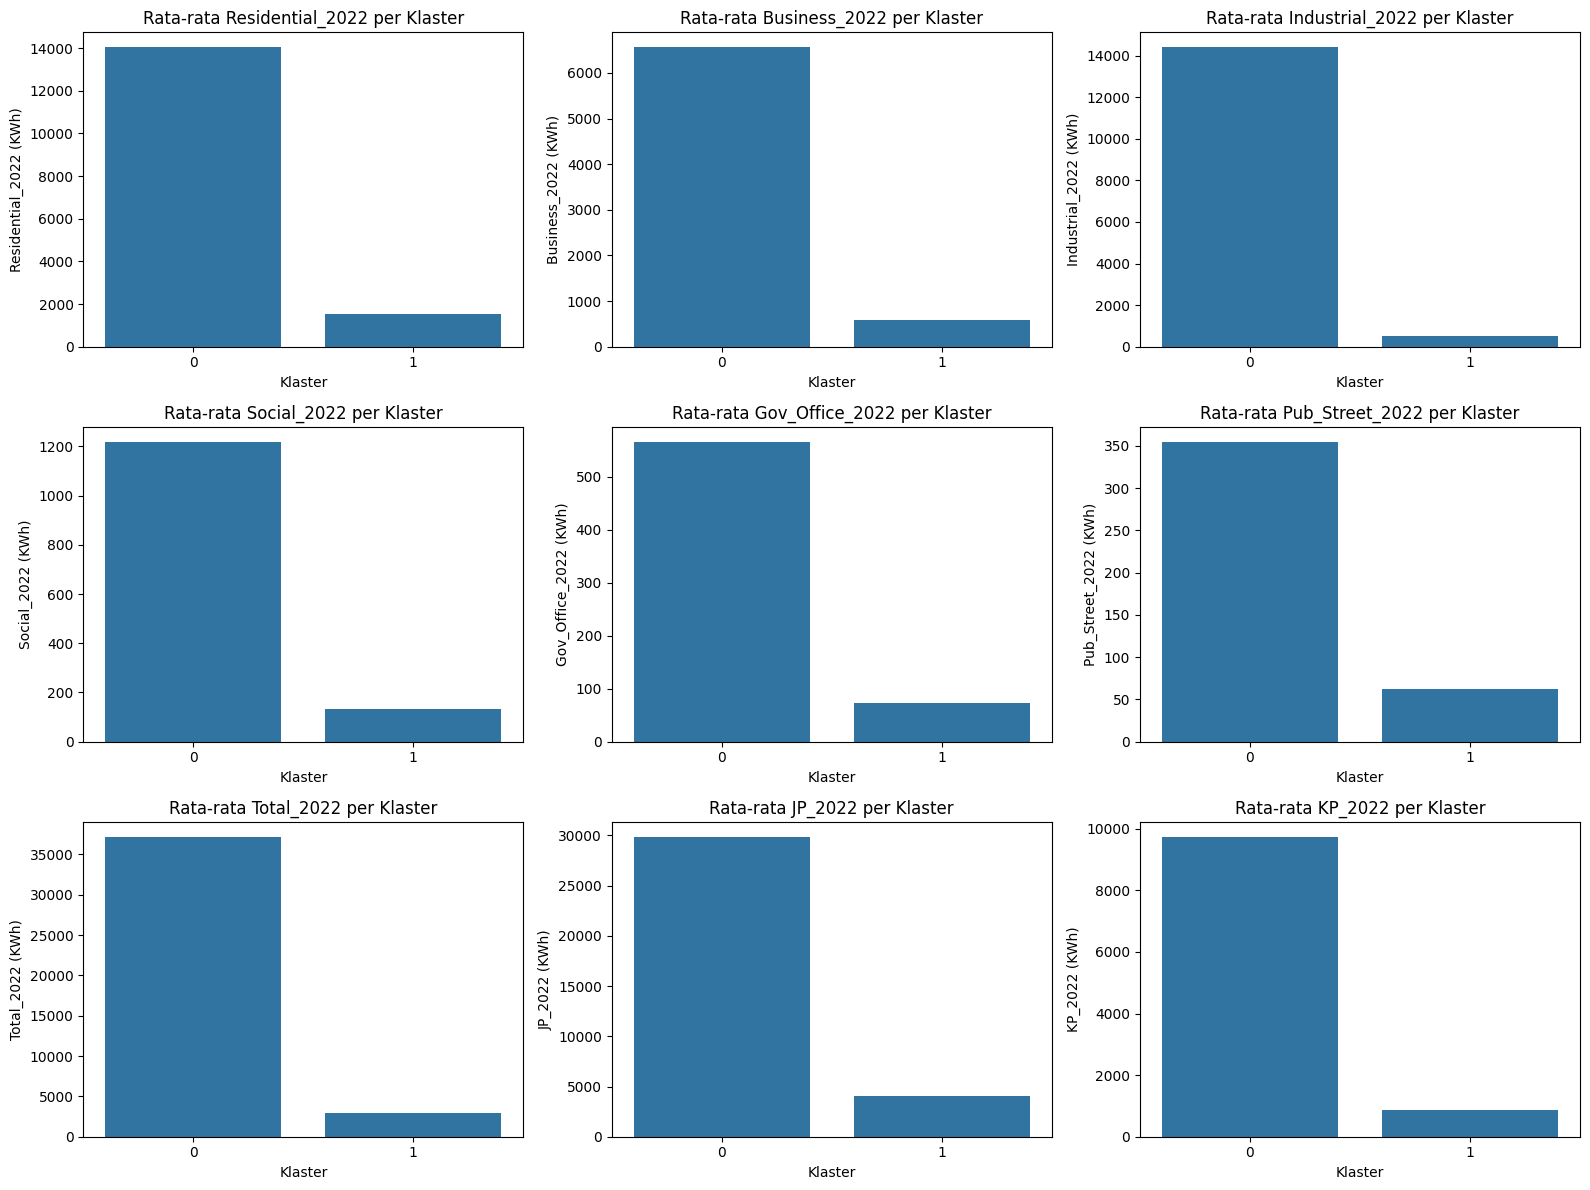

In [218]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features2, 1):
    plt.subplot(3, 3, i)  
    sns.barplot(data=dataf, x='Cluster2', y=feature, ci=None)  
    plt.title(f"Rata-rata {feature} per Klaster")
    plt.xlabel("Klaster")
    plt.ylabel(f"{feature} (KWh)")
plt.tight_layout()
plt.show()

In [219]:
features3 = ['Residential', 'Business', 'Industrial', 'Social', 'Gov_Office', 'Pub_Street', 'Total', 'JP_2023', 'KP_2023']

data_T2023 = dataf[features3]

scaler3 = RobustScaler()
scaled_features3 = scaler3.fit_transform(data_T2023)


k =2
medoid3 = np.random.choice(len(scaled_features3), size=k, replace=False)
medoids3 = scaled_features3[medoid3]

def update_medoids(dataf, medoids3):
    distances3 = pairwise_distances(dataf, medoids3)
    labels3 = np.argmin(distances3, axis=1)

    new_medoids3 = []
    for i in range(k):
        cluster_points3 = dataf[labels3 == i]
        intra_distances3 = pairwise_distances(cluster_points3)
        min_index3 = np.argmin(intra_distances3.sum(axis=1))
        new_medoids3.append(cluster_points3[min_index3])
    
    return np.array(new_medoids3), labels3

for _ in range(len(scaled_features3)):  
    new_medoids3, labels3 = update_medoids(scaled_features3, medoids3)
    if np.allclose(new_medoids3, medoids3):
        break
    medoids3 = new_medoids3

dataf['Cluster3'] = labels3

provinsi_per_cluster3 = dataf[['Province', 'Cluster3']].sort_values(by='Cluster3')


for cluster in range(k):  
    print(f"Provinsi dalam Cluster3 {cluster}:")
    print(provinsi_per_cluster3[provinsi_per_cluster3['Cluster3'] == cluster]['Province'].tolist())

    print(f"Nilai data point (medoid) untuk Cluster3 {cluster}:")
    print(medoids3[cluster])  
    print("\n")

Provinsi dalam Cluster3 0:
['DKI Jakarta', 'Jawa Timur', 'Banten', 'Jawa Tengah', 'Jawa Barat']
Nilai data point (medoid) untuk Cluster3 0:
[ 6.0124565   5.18930831 15.70442206  7.2202729   5.90813945  5.10745891
  7.87769459  9.05843857  7.89771531]


Provinsi dalam Cluster3 1:
['Aceh', 'Sumatera Barat', 'Sumatera Utara', 'Kep. Bangka Belitung', 'Lampung', 'Kalimantan Barat', 'Riau', 'Kep. Riau', 'Sumatera Selatan', 'Jambi', 'Bengkulu', 'Sulawesi Tengah', 'Gorontalo', 'Sulawesi Utara', 'Kalimantan Tengah', 'Kalimantan Selatan', 'Sulawesi Selatan', 'Sulawesi Barat', 'Sulawesi Tenggara', 'Bali', 'Papua Barat', 'Papua', 'Maluku Utara', 'Maluku', 'Nusa Tenggara Timur', 'Nusa Tenggara Barat', 'DI Yogyakarta', 'Kalimantan Timur', 'Kalimantan Utara']
Nilai data point (medoid) untuk Cluster3 1:
[-0.22673456 -0.1440836   0.11229104 -0.08363933 -0.43400346 -0.05927799
 -0.09165846 -0.3949705  -0.25429444]




C:\Users\Jeff\AppData\Local\Temp\ipykernel_21284\4023313553.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataf, x='Cluster3', y=feature, ci=None)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_21284\4023313553.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataf, x='Cluster3', y=feature, ci=None)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_21284\4023313553.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataf, x='Cluster3', y=feature, ci=None)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_21284\4023313553.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataf, x='Cluster3', y=feature, ci=None)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_21284\4023313553.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `er

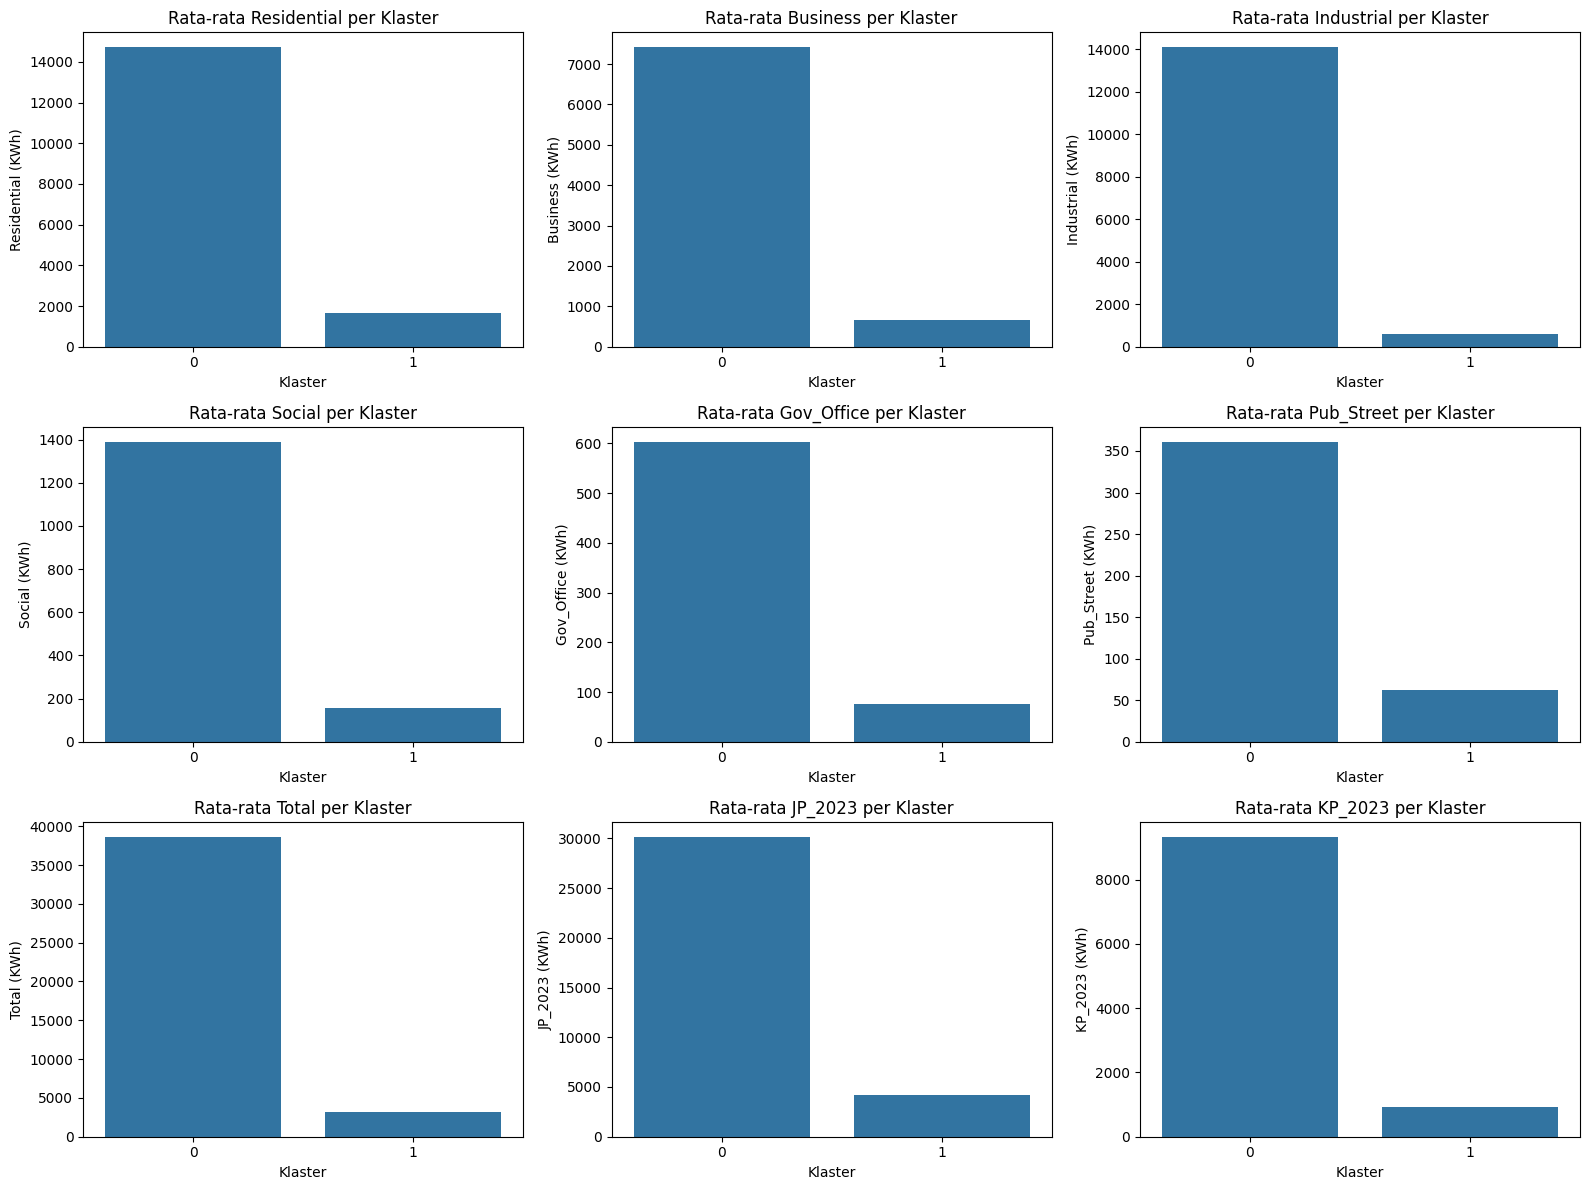

In [220]:
plt.figure(figsize=(16, 12))

for i, feature in enumerate(features3, 1):
    plt.subplot(3, 3, i) 
    sns.barplot(data=dataf, x='Cluster3', y=feature, ci=None)  
    plt.title(f"Rata-rata {feature} per Klaster")
    plt.xlabel("Klaster")
    plt.ylabel(f"{feature} (KWh)")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

sil_score_2021 = silhouette_score(scaled_features, dataf['Cluster'])
print(f"Silhouette Score untuk 2021: {sil_score_2021}")


sil_score_2022 = silhouette_score(scaled_features2, dataf['Cluster2'])
print(f"Silhouette Score untuk 2022: {sil_score_2022}")

sil_score_2023 = silhouette_score(scaled_features3, dataf['Cluster3'])
print(f"Silhouette Score untuk 2023: {sil_score_2023}")


Silhouette Score untuk 2021: 0.8133220488555215
Silhouette Score untuk 2022: 0.8116370248906389
Silhouette Score untuk 2023: 0.8052039869077368
